In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GroupBy

La méthode groupby est l'une des fonctions les plus puissantes de Pandas. Elle permet de regrouper un DataFrame en groupes en fonction de certaines caractéristiques et d'appliquer des opérations à ces groupes. Elle est très utile pour l'agrégation de données et l'analyse de données en général.

In [33]:
data = {'country': ['France', 'France', 'France', 'USA', 'USA', 'USA', 'Allemagne', 'Allemagne', 'Allemagne'],
        'city': ['Paris', 'Marseille', 'Lyon', 'New York', 'Los Angeles', 'Chicago', 'Berlin', 'Munich', 'Hambourg'],
        'population': [2206488, 863310, 516092, 8398748, 3990456, 2705994, 3748148, 1471508, 1841179],
        'pib': [2583567, 1013856, 606000, 21427000, 10542484, 7100974, 4057944, 1582464, 1981282]}
df = pd.DataFrame(data)

In [3]:
df

,country,city,population,pib
0,France,Paris,2206488,2583567
1,France,Marseille,863310,1013856
2,France,Lyon,516092,606000
3,USA,New York,8398748,21427000
4,USA,Los Angeles,3990456,10542484
5,USA,Chicago,2705994,7100974
6,Allemagne,Berlin,3748148,4057944
7,Allemagne,Munich,1471508,1582464
8,Allemagne,Hambourg,1841179,1981282


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     9 non-null      object
 1   city        9 non-null      object
 2   population  9 non-null      int64 
 3   pib         9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [35]:
df.groupby('country')[['population', 'pib']].mean()

,population,pib
country,,
Allemagne,2.353612e+06,2.540563e+06
France,1.195297e+06,1.401141e+06
USA,5.031733e+06,1.302349e+07


Comme vous pouvez le voir, la méthode groupby a regroupé les données par pays et a calculé la moyenne de la population et du PIB de chaque groupe.

In [6]:
df2 = pd.DataFrame({'country': ['France', 'France', 'France', 'France', 'France', 'France','USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
        'city': ['Paris', 'Marseille', 'Lyon',  'Paris', 'Marseille', 'Lyon', 'New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago'],
        'value': [i for i in range(30,42)]})
df2

,country,city,value
0,France,Paris,30
1,France,Marseille,31
2,France,Lyon,32
3,France,Paris,33
4,France,Marseille,34
5,France,Lyon,35
6,USA,New York,36
7,USA,Los Angeles,37
8,USA,Chicago,38
9,USA,New York,39


In [7]:
df2_ = df2.groupby(['country', 'city']).mean()
df2_

value
country city              
France  Lyon          33.5
        Marseille     32.5
        Paris         31.5
USA     Chicago       39.5
        Los Angeles   38.5
        New York      37.5

In [8]:
df2_.loc[('France', 'Paris'),'value']

np.float64(31.5)

On peut également regrouper avec plus caractéristiques

## GroupBy personnalisé

On peut utiliser .agg() après un groupby pour personnaliser le regroupement, ici une concaténation de string avec l'insertion d'une virgule entre chaque, tout ceci en utilisant une fonction lambda

In [9]:
df[['country', 'city']]

,country,city
0,France,Paris
1,France,Marseille
2,France,Lyon
3,USA,New York
4,USA,Los Angeles
5,USA,Chicago
6,Allemagne,Berlin
7,Allemagne,Munich
8,Allemagne,Hambourg


In [10]:
df_cities = df[['country', 'city']].groupby('country').agg(lambda x: ', '.join(x))

In [11]:
df_cities

,city
country,
Allemagne,"Berlin, Munich, Hambourg"
France,"Paris, Marseille, Lyon"
USA,"New York, Los Angeles, Chicago"


In [12]:
def func(vec):
    return [i**2 for i in vec]

In [13]:
df2.groupby('country').agg({"value":func})

,value
country,
France,"[900, 961, 1024, 1089, 1156, 1225]"
USA,"[1296, 1369, 1444, 1521, 1600, 1681]"


In [14]:
df2

,country,city,value
0,France,Paris,30
1,France,Marseille,31
2,France,Lyon,32
3,France,Paris,33
4,France,Marseille,34
5,France,Lyon,35
6,USA,New York,36
7,USA,Los Angeles,37
8,USA,Chicago,38
9,USA,New York,39


In [15]:
df_cities.loc['France'].city

'Paris, Marseille, Lyon'

# apply() et map() et pivot_table

Nous aurons probablement besoin, au cours d'un travail d'analyse et de manipulation de données, d'appliquer des fonctions sur une partie ou toutes nos données.

C'est alors qu'apply() et map() interviennent

map() permet d'appliquer une fonction sur une Series pandas, son fonctionnement rappelle très vite la fonction python build-in qui porte le même nom.

In [16]:
# Etant donné le dataframe suivant

cardata = pd.read_csv('cardata.csv')

In [17]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## map()

In [18]:
# Je souhaite par exemple convertir les Km parcours en miles et stocker le résultat dans une colonne 'Miles_Driven'
# On rappelle que pour convertir de kms vers miles il faut faire : miles = kms * 0.621371

cardata['Miles_Driven'] = cardata.Kms_Driven.map(lambda x: x * 0.621371)

# Evidemment il est aussi plus simple de faire comme ça :
# cardata['Miles_Driven'] = cardata.Kms_Driven * 0.621371
# mais ce n'est pas le propos

In [19]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Miles_Driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,16777.017000
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,26718.953000
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4287.459900
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,3231.129200
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,26377.198950
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,21119.157548
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,37282.260000
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,54639.637514
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,5592.339000


In [20]:
# Avec map(), je peux aussi utiliser une fonction écrite préalablement 
def convert_to_miles(cell):
    return cell * 0.621371

cardata['Miles_Driven'] = cardata.Kms_Driven.map(convert_to_miles)

## apply()

Apply permet d'appliquer une fonction sur l'ensemble du dataframe, lignes par lignes (si axis=1) ou colonnes par colonnes.

In [36]:
def compute(row):
    return row['Selling_Price'] + row['Present_Price']

cardata['result'] = cardata.apply(compute, axis=1)

In [37]:
cardata['result']  = cardata['Selling_Price'] + cardata['Present_Price']

In [23]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Miles_Driven,result
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,16777.017000,8.94
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,26718.953000,14.29
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4287.459900,17.10
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,3231.129200,7.00
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,26377.198950,11.47
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,21119.157548,21.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,37282.260000,9.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,54639.637514,14.35
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,5592.339000,24.00


## Pivot table

In [24]:
# Pivot_table est une méthode très puissante qui "fait partie" de la famille des aggrégateurs (comme groupby)
# Cela permet de grouper cette fois-ci les informations sur deux dimensions, lignes et colonnes (groupby ne fait que sur les lignes)

#Pivot table prend ces arguments

# index : variable(s) placée(s) en lignes

# columns : variable(s) placée en colonne(s)

# values : variable sur laquelle on va appliquer la fonction d’agrégation

# aggfunc : fonction d’agrégation, une chaîne de caractère comme 'sum' par exemple

# Il est important de bien choisir entre variables quantitatives et variables qualitatives !

# Dans l'exemple ci-dessous, nous pouvons récupérer la somme des prix de ventes des véhicules par an et par type de transmission
# On peut rajouter fillna() à la fin pour formaliser correctement les choses


cardata.pivot_table(index='Year', columns='Transmission', values='Selling_Price', aggfunc='mean', fill_value=0)

Transmission,Automatic,Manual
Year,,
2003,0.000000,1.300000
2004,1.500000,0.000000
2005,0.000000,2.487500
2006,2.500000,1.083333
2007,0.000000,0.160000
2008,1.473333,0.650000
2009,3.600000,2.660000
2010,2.750000,5.649231
2011,4.400000,2.262778


<Axes: xlabel='Year'>

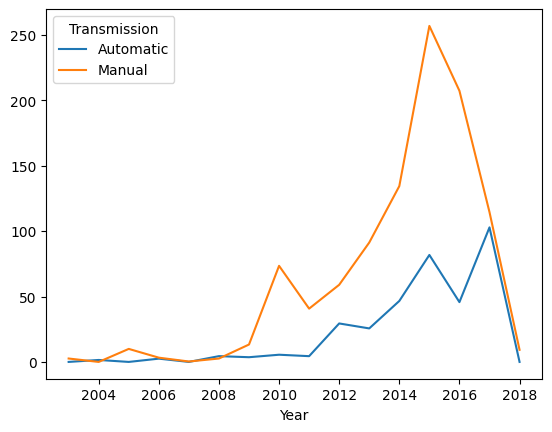

In [ ]:
# Ainsi on peut mettre sur un graphique nos résultats

cardata.pivot_table(index='Year', columns=['Transmission'], values='Selling_Price', aggfunc='sum').fillna(0).plot()
plt.ylabel('Total Selling Price (m$)')
plt.show()

## Exercices

In [52]:
# Exo 1
# Faire un barplot vertical groupé représentant la moyenne du prix de vente (en dollars, attention, dans le dataframe les prix sont en milliers de dollars) en fonction du type de carburant et du type de boîte de vitesse
# Comme présenté ci-dessous

<Axes: xlabel='Transmission'>

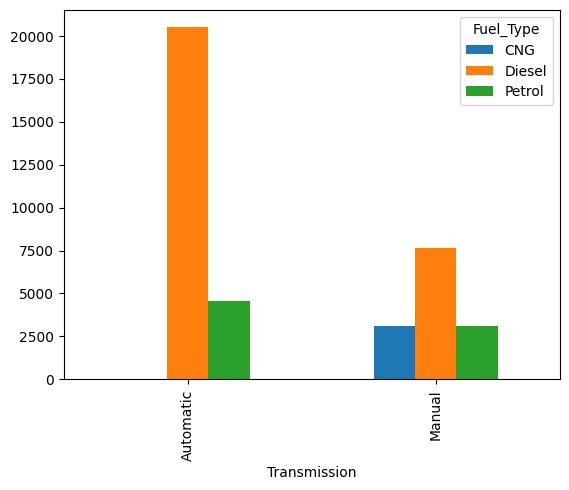

In [56]:
cardata.groupby(['Transmission', 'Fuel_Type'])['Selling_Price'].mean().map(lambda x: x * 1000).unstack().plot(kind='bar')

cardata.pivot_table(
    index='Transmission',
    columns='Fuel_Type',
    values='Selling_Price',
    aggfunc='mean'
).map(lambda x: x * 1000).plot(kind='bar')

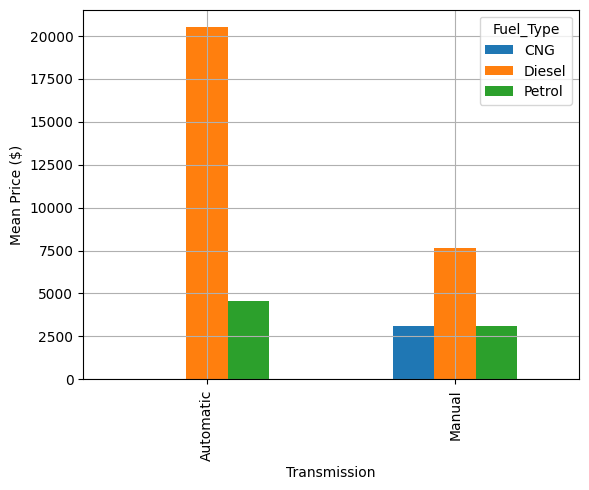

In [27]:
# Exo 2
# Les véhicules de la marque 'Bajaj' disposent, dans leur dénomination (colonne 'Car_Name') le nombre de chevaux
# Extraire ce nombre de chevaux dans une nouvelle colonne appelée 'banjaj_number', dans le cas où ce n'est pas un véhicule de cette marque, spécifier 0

In [ ]:
cardata.groupby('Car_Name')

In [28]:
cardata[cardata.Car_Name.str.contains('Bajaj')].head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Miles_Driven,result
101,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,745.6452,3.05
118,Bajaj Pulsar RS200,2016,1.05,1.26,5700,Petrol,Individual,Manual,0,3541.8147,2.31
124,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,807.7823,1.85
125,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0,4349.5970,1.55
130,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0,2174.7985,1.70


In [29]:
#Exo 3
#Pour chaque véhicule, récupérer son prix de vente, multiplier le par 1000 et formaliser une chaîne de caractère du type :
#"Selling price is : XXXX $" avec XXXX le prix de vente, en revanche, il est important de rajouter 0.4 % sur les véhicules Diesel, stocker le tout dans une colonne
#appelée "Selling_text"

In [30]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Miles_Driven,result
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,16777.017000,8.94
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,26718.953000,14.29
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4287.459900,17.10
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,3231.129200,7.00
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,26377.198950,11.47
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,21119.157548,21.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,37282.260000,9.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,54639.637514,14.35
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,5592.339000,24.00


In [31]:
# Exo 4

# Pour chaque véhicule, rajouter au prix de vente 0.9 % si c'est une transmission Manuelle et si le type de carburant est du Diesel, en revanche il ne faut pas rajouter cet apport si le véhicule date d'après 2015.

In [32]:
cardata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Miles_Driven,result
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,16777.017000,8.94
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,26718.953000,14.29
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4287.459900,17.10
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,3231.129200,7.00
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,26377.198950,11.47
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,21119.157548,21.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,37282.260000,9.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,54639.637514,14.35
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,5592.339000,24.00
